In [198]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### RNA sequence data

In [2]:
rnaseq = pd.read_csv('training/rnaseq.csv')

In [13]:
def TransposeRnaSeqTable(rnaseq_table):
    transposed = pd.DataFrame(rnaseq_table.iloc[:,2:].T)
    transposed.columns = rnaseq_table['Gene']
    return transposed

In [14]:
specimens = TransposeRnaSeqTable(rnaseq)
print(specimens.shape)
specimens.head(3)

(213, 63677)


Gene,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000273484,ENSG00000273485,ENSG00000273486,ENSG00000273487,ENSG00000273488,ENSG00000273489,ENSG00000273490,ENSG00000273491,ENSG00000273492,ENSG00000273493
13-00098,-4.283015,-4.283015,5.293654,3.953188,4.557584,3.469123,0.823726,5.398720,5.881616,6.332506,...,-4.283015,-3.176196,1.203722,-3.625968,-1.297111,-3.625968,-4.283015,-4.283015,-4.283015,-3.625968
13-00118,-2.579843,-4.283015,4.592634,4.675118,3.644984,7.656301,2.883923,5.734598,5.964844,6.488802,...,-4.283015,-2.854272,1.560065,-2.854272,0.309481,-4.283015,-4.283015,-4.283015,-4.283015,-4.283015
13-00149,-2.038435,-4.283015,4.898245,4.524586,4.723479,5.998933,2.447976,5.590251,6.734444,6.185074,...,-4.283015,-2.633829,1.753293,-3.665583,-0.336114,-4.283015,-4.283015,-4.283015,-4.283015,-2.903159


### Labels

In [98]:
aucs = pd.read_csv('training/aucs.csv')

#response = pd.read_csv('training/response.csv') -- Y (Ground Truth) for SC2 

In [12]:
print(aucs.shape)
aucs.head(3)

(20242, 3)


,lab_id,inhibitor,auc
0,13-00098,17-AAG (Tanespimycin),230.223782
1,13-00118,17-AAG (Tanespimycin),217.469453
2,13-00149,17-AAG (Tanespimycin),206.326341


### Clinical categorical

20 discrete features, from 2 to 15 values, no NAs.

Rows are in a different order in comparison with <code>rnaseq</code> table!

In [94]:
clin_cat = pd.read_csv('training/clinical_categorical.csv', header = 0, index_col = 'lab_id')
clin_cat_legend = pd.read_csv('training/clinical_categorical_legend.csv')

clin_cat_test = pd.read_csv('leaderboard/clinical_categorical.csv', header = 0, index_col = 'lab_id')

In [95]:
print(clin_cat.shape)
print(clin_cat_test.shape)

clin_cat.head(3)

(213, 20)


,priorMalignancyNonMyeloid,priorMalignancyType,priorMalignancyRadiationTx,priorMDS,priorMDSMoreThanTwoMths,priorMDSMPN,priorMDSMPNMoreThanTwoMths,priorMPN,priorMPNMoreThanTwoMths,dxAtInclusion,specificDxAtInclusion,dxAtSpecimenAcquisition,specificDxAtAcquisition,specimenType,consensus_sex,FAB/Blast.Morphology,Karyotype,FLT3-ITD,NPM1,finalFusion
lab_id,,,,,,,,,,,,,,,,,,,,
14-00135,0,0,0,0,0,0,0,0,0,0,5,0,5,0,1,4,5,0,0,4
16-00315,0,0,0,0,0,0,0,0,0,0,2,0,2,2,1,0,5,0,0,4
16-01094,0,0,0,0,0,0,0,0,0,0,9,0,9,0,0,0,1,0,0,4


In [193]:
print(sum(clin_cat.count() != clin_cat.shape[0]))
print(sum(clin_cat_test.count() != clin_cat_test.shape[0]))

0
0


In [82]:
for col in clin_cat.columns:
    print(col, clin_cat[col].nunique())

priorMalignancyNonMyeloid 2
priorMalignancyType 6
priorMalignancyRadiationTx 2
priorMDS 2
priorMDSMoreThanTwoMths 2
priorMDSMPN 2
priorMDSMPNMoreThanTwoMths 2
priorMPN 2
priorMPNMoreThanTwoMths 2
dxAtInclusion 3
specificDxAtInclusion 15
dxAtSpecimenAcquisition 3
specificDxAtAcquisition 14
specimenType 3
consensus_sex 2
FAB/Blast.Morphology 7
Karyotype 6
FLT3-ITD 2
NPM1 2
finalFusion 8


In [83]:
print(clin_cat_legend.shape)
clin_cat_legend.head(3)

(87, 3)


,column,enum,value
0,priorMalignancyNonMyeloid,0,n
1,priorMalignancyNonMyeloid,1,y
2,priorMalignancyType,0,UNKNOWN


In [84]:
clin_cat_legend.column.value_counts()

specificDxAtInclusion         15
specificDxAtAcquisition       14
finalFusion                    8
FAB/Blast.Morphology           7
Karyotype                      6
priorMalignancyType            6
specimenType                   3
dxAtSpecimenAcquisition        3
dxAtInclusion                  3
priorMalignancyRadiationTx     2
priorMalignancyNonMyeloid      2
priorMDSMoreThanTwoMths        2
FLT3-ITD                       2
priorMDSMPNMoreThanTwoMths     2
priorMPN                       2
priorMPNMoreThanTwoMths        2
priorMDSMPN                    2
consensus_sex                  2
priorMDS                       2
NPM1                           2
Name: column, dtype: int64

In [34]:
for col in clin_cat_legend.column.unique():
    print(col)
    print(clin_cat_legend[clin_cat_legend.column == col])

priorMalignancyNonMyeloid
                      column  enum value
0  priorMalignancyNonMyeloid     0     n
1  priorMalignancyNonMyeloid     1     y
priorMalignancyType
                column  enum                  value
2  priorMalignancyType     0                UNKNOWN
3  priorMalignancyType     1          Breast Cancer
4  priorMalignancyType     2            Lung Cancer
5  priorMalignancyType     3  Non-Hodgkins Lymphoma
6  priorMalignancyType     4        Prostate Cancer
7  priorMalignancyType     5                  OTHER
priorMalignancyRadiationTx
                       column  enum value
8  priorMalignancyRadiationTx     0     n
9  priorMalignancyRadiationTx     1     y
priorMDS
      column  enum value
10  priorMDS     0     n
11  priorMDS     1     y
priorMDSMoreThanTwoMths
                     column  enum value
12  priorMDSMoreThanTwoMths     0     n
13  priorMDSMoreThanTwoMths     1     y
priorMDSMPN
         column  enum value
14  priorMDSMPN     0     n
15  priorMDSMPN   

In [210]:
clin_cat_ohe_columns = pd.get_dummies(clin_cat.astype('category'), drop_first=True).columns

onehot_encoder = OneHotEncoder(sparse=False, drop='first', dtype=np.int)
clin_cat_ohe = pd.DataFrame(onehot_encoder.fit_transform(clin_cat), 
                            index = clin_cat.index, 
                            columns = clin_cat_ohe_columns)
clin_cat_test_ohe = pd.DataFrame(onehot_encoder.transform(clin_cat_test), 
                                 index = clin_cat_test.index,
                                 columns = clin_cat_ohe_columns)
print(clin_cat_ohe.shape, clin_cat_test_ohe.shape)
clin_cat_ohe.head(3)

(213, 67) (80, 67)


,priorMalignancyNonMyeloid_1,priorMalignancyType_1,priorMalignancyType_2,priorMalignancyType_3,priorMalignancyType_4,priorMalignancyType_5,priorMalignancyRadiationTx_1,priorMDS_1,priorMDSMoreThanTwoMths_1,priorMDSMPN_1,...,Karyotype_5,FLT3-ITD_1,NPM1_1,finalFusion_1,finalFusion_2,finalFusion_3,finalFusion_4,finalFusion_5,finalFusion_6,finalFusion_7
lab_id,,,,,,,,,,,,,,,,,,,,,
14-00135,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
16-00315,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
16-01094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Clinical numerical

In [100]:
clin_num = pd.read_csv('training/clinical_numerical.csv', header = 0, index_col = 'lab_id')
clin_num_test = pd.read_csv('leaderboard/clinical_numerical.csv', header = 0, index_col = 'lab_id')

In [101]:
print(clin_num.shape)
clin_num.head(3)

(213, 5)


,ageAtDiagnosis,timeOfSampleCollectionRelativeToInclusion,%.Blasts.in.PB,WBC.Count,ageAtSpecimenAcquisition
lab_id,,,,,
13-00098,64.0,0.0,0.0,1.5,64.0
13-00118,54.0,349.0,83.0,33.8,57.0
13-00149,78.0,0.0,72.0,8.5,79.0


In [123]:
clin_num[clin_num.ageAtDiagnosis.isnull()]

,ageAtDiagnosis,timeOfSampleCollectionRelativeToInclusion,%.Blasts.in.PB,WBC.Count,ageAtSpecimenAcquisition
lab_id,,,,,
13-00650,NaN,2.0,NaN,NaN,20.0


In [102]:
clin_num.count()

ageAtDiagnosis                               212
timeOfSampleCollectionRelativeToInclusion    213
%.Blasts.in.PB                               152
WBC.Count                                    181
ageAtSpecimenAcquisition                     213
dtype: int64

In [120]:
clin_num_test.count()

ageAtDiagnosis                               79
timeOfSampleCollectionRelativeToInclusion    80
%.Blasts.in.PB                               54
WBC.Count                                    63
ageAtSpecimenAcquisition                     79
dtype: int64

In [124]:
clin_num_test[clin_num_test.ageAtDiagnosis.isnull()]

,ageAtDiagnosis,timeOfSampleCollectionRelativeToInclusion,%.Blasts.in.PB,WBC.Count,ageAtSpecimenAcquisition
lab_id,,,,,
13-00601,NaN,4.0,NaN,NaN,NaN


In [104]:
for i in range(clin_num.shape[1]):
    print(clin_num.columns[i], sum(clin_num[clin_num.columns[i]] == 0))

ageAtDiagnosis 0
timeOfSampleCollectionRelativeToInclusion 179
%.Blasts.in.PB 7
WBC.Count 0
ageAtSpecimenAcquisition 0


ageAtDiagnosis


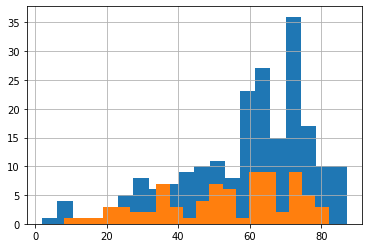

timeOfSampleCollectionRelativeToInclusion


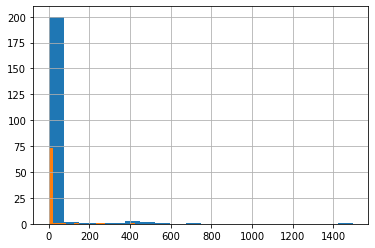

%.Blasts.in.PB


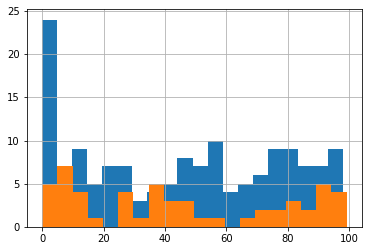

WBC.Count


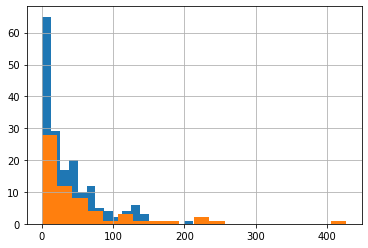

ageAtSpecimenAcquisition


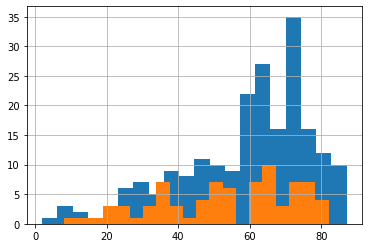

In [211]:
for i in range(clin_num.shape[1]):
    print(clin_num.columns[i])
    clin_num[clin_num.columns[i]].hist(bins = 20)
    clin_num_test[clin_num_test.columns[i]].hist(bins = 20)
    plt.show()

In [216]:
clin_num_filled = clin_num.fillna(clin_num.median(), inplace=False)
clin_num_test_filled = clin_num_test.fillna(clin_num.median(), inplace=False)

### DNA sequence

In [171]:
dnaseq = pd.read_csv('training/dnaseq.csv', header = 0)
#dnaseq.drop('Transcript_ID', axis = 1, inplace = True)

In [162]:
dnaseq_test = pd.read_csv('leaderboard/dnaseq.csv', header = 0)
dnaseq_test.drop('Transcript_ID', axis = 1, inplace = True)

In [172]:
print(dnaseq.shape)
dnaseq.head()

(661, 10)


,lab_id,Chromosome,Start_Position,End_Position,Reference_Allele,Alt_Allele,Transcript_ID,Hugo_Symbol,HGVSp_Short,var_name
0,13-00245,X,120009392,120009392,T,C,ENST00000371311,CT47B1,p.M45V,CT47B1_p.M45V
1,13-00425,13,28610138,28610138,G,A,ENST00000241453,FLT3,p.S451F,FLT3_p.S451F
2,14-00613,7,40127734,40127734,A,T,ENST00000181839,CDK13,p.L1013F,CDK13_p.L1013F
3,15-00296,12,25398281,25398281,C,T,ENST00000256078,KRAS,p.G13D,KRAS_p.G13D
4,15-00296,1,115256528,115256528,T,A,ENST00000369535,NRAS,p.Q61H,NRAS_p.Q61H


In [175]:
dnaseq.Alt_Allele.nunique()

23

In [170]:
dnaseq.groupby('Hugo_Symbol').Reference_Allele.nunique()

Hugo_Symbol
A1CF       1
AARS2      1
ABCA9      1
ABI3BP     1
ACAN       1
          ..
ZNF195     2
ZNF285     1
ZNF518B    1
ZNF711     1
ZZEF1      1
Name: Reference_Allele, Length: 238, dtype: int64

In [143]:
dnaseq.lab_id.value_counts()

15-00767    14
16-01223    10
15-00464    10
13-00420     9
14-00083     9
            ..
14-00831     1
16-01004     1
16-01097     1
16-00094     1
13-00406     1
Name: lab_id, Length: 200, dtype: int64

In [142]:
dnaseq.Hugo_Symbol.nunique()

238

In [150]:
dnaseq_test[dnaseq_test.Hugo_Symbol.isin(dnaseq.Hugo_Symbol)].shape

(215, 10)

In [149]:
dnaseq_test[~dnaseq_test.Hugo_Symbol.isin(dnaseq.Hugo_Symbol)].shape

(67, 10)